# Cognitive Robotics Lab

I will be using a deep learning architecture, Convolutional Neural Network (CNN), to perform image classification on the CIFAR-10 dataset.

## Load Data

### Imports

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop
from keras.callbacks import LearningRateScheduler


import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [ ]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

### Loading CIFAR 10 dataset

In [ ]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

170498071/170498071 [==============================] - 4s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Base Model

In [ ]:
def create_base_model():
    model = Sequential()

    model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(10, activation='softmax'))

    return model

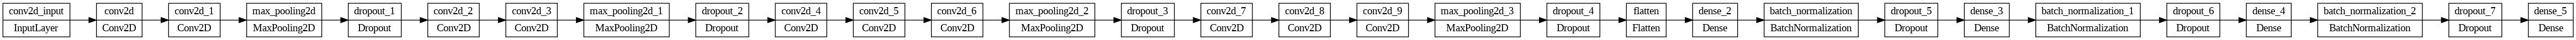

In [ ]:
model = create_base_model()

# Plot the simplified model with landscape orientation
utils.plot_model(model, to_file='model.png', rankdir='LR', show_shapes=False, show_dtype=False)

## Learning Rate Experiments

### Learning Rate 0.00001

In [ ]:
model = create_base_model()

In [ ]:
# Adam optimizer with initial learning rate
optimizer = Adam(learning_rate=0.00001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

history = model.fit(input_X_train, output_Y_train, batch_size=128, epochs=20, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/20
313/313 [==============================] - 26s 61ms/step - loss: 3.3142 - accuracy: 0.1188 - val_loss: 2.4142 - val_accuracy: 0.0952
Epoch 2/20
313/313 [==============================] - 17s 54ms/step - loss: 3.0865 - accuracy: 0.1409 - val_loss: 2.4883 - val_accuracy: 0.1181
Epoch 3/20
313/313 [==============================] - 17s 55ms/step - loss: 2.8982 - accuracy: 0.1624 - val_loss: 2.8357 - val_accuracy: 0.1302
Epoch 4/20
313/313 [==============================] - 18s 56ms/step - loss: 2.6861 - accuracy: 0.1867 - val_loss: 3.0993 - val_accuracy: 0.1311
Epoch 5/20
313/313 [==============================] - 18s 58ms/step - loss: 2.5426 - accuracy: 0.2059 - val_loss: 2.6262 - val_accuracy: 0.1590
Epoch 6/20
313/313 [==============================] - 18s 56ms/step - loss: 2.4359 - accuracy: 0.2243 - val_loss: 2.4234 - val_accuracy: 0.1908
Epoch 7/20
313/313 [==============================] - 18s 57ms/step - loss: 2.3392 - accuracy: 0.2403 - val_loss: 2.2363 - val_accuracy:

In [ ]:
history = model.fit(input_X_train, output_Y_train, batch_size=128, epochs=20, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/20
313/313 [==============================] - 17s 55ms/step - loss: 1.6802 - accuracy: 0.4124 - val_loss: 1.7201 - val_accuracy: 0.4042
Epoch 2/20
313/313 [==============================] - 17s 53ms/step - loss: 1.6513 - accuracy: 0.4236 - val_loss: 1.6603 - val_accuracy: 0.4204
Epoch 3/20
313/313 [==============================] - 17s 54ms/step - loss: 1.6243 - accuracy: 0.4326 - val_loss: 1.5640 - val_accuracy: 0.4442
Epoch 4/20
313/313 [==============================] - 17s 54ms/step - loss: 1.5992 - accuracy: 0.4390 - val_loss: 1.5154 - val_accuracy: 0.4595
Epoch 5/20
313/313 [==============================] - 16s 52ms/step - loss: 1.5704 - accuracy: 0.4476 - val_loss: 1.5838 - val_accuracy: 0.4533
Epoch 6/20
313/313 [==============================] - 17s 55ms/step - loss: 1.5438 - accuracy: 0.4554 - val_loss: 1.5801 - val_accuracy: 0.4585
Epoch 7/20
313/313 [==============================] - 18s 58ms/step - loss: 1.5233 - accuracy: 0.4656 - val_loss: 1.5947 - val_accuracy:

### Learning Rate 0.0001

In [ ]:
model = create_base_model()

In [ ]:
# Adam optimizer with initial learning rate
optimizer = Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

history = model.fit(input_X_train, output_Y_train, batch_size=128, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/40
313/313 [==============================] - 22s 54ms/step - loss: 2.7599 - accuracy: 0.1568 - val_loss: 2.3126 - val_accuracy: 0.1770
Epoch 2/40
313/313 [==============================] - 16s 53ms/step - loss: 2.2008 - accuracy: 0.2482 - val_loss: 1.9322 - val_accuracy: 0.2705
Epoch 3/40
313/313 [==============================] - 17s 53ms/step - loss: 1.8550 - accuracy: 0.3391 - val_loss: 1.7068 - val_accuracy: 0.3988
Epoch 4/40
313/313 [==============================] - 17s 54ms/step - loss: 1.5868 - accuracy: 0.4310 - val_loss: 1.3706 - val_accuracy: 0.5131
Epoch 5/40
313/313 [==============================] - 17s 53ms/step - loss: 1.3935 - accuracy: 0.5016 - val_loss: 1.2104 - val_accuracy: 0.5709
Epoch 6/40
313/313 [==============================] - 16s 52ms/step - loss: 1.2561 - accuracy: 0.5548 - val_loss: 1.2813 - val_accuracy: 0.5629
Epoch 7/40
313/313 [==============================] - 17s 54ms/step - loss: 1.1481 - accuracy: 0.5953 - val_loss: 1.0557 - val_accuracy:

### Learning Rate 0.001

In [ ]:
model = create_base_model()

In [ ]:
# Adam optimizer with initial learning rate
optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

history = model.fit(input_X_train, output_Y_train, batch_size=128, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/40
313/313 [==============================] - 22s 55ms/step - loss: 2.3008 - accuracy: 0.1911 - val_loss: 1.8683 - val_accuracy: 0.2529
Epoch 2/40
313/313 [==============================] - 17s 54ms/step - loss: 1.9054 - accuracy: 0.2570 - val_loss: 1.9355 - val_accuracy: 0.2661
Epoch 3/40
313/313 [==============================] - 16s 52ms/step - loss: 1.6954 - accuracy: 0.3331 - val_loss: 1.9152 - val_accuracy: 0.2818
Epoch 4/40
313/313 [==============================] - 17s 53ms/step - loss: 1.5208 - accuracy: 0.4113 - val_loss: 1.4290 - val_accuracy: 0.4605
Epoch 5/40
313/313 [==============================] - 16s 51ms/step - loss: 1.3367 - accuracy: 0.5011 - val_loss: 1.3495 - val_accuracy: 0.5006
Epoch 6/40
313/313 [==============================] - 16s 51ms/step - loss: 1.1660 - accuracy: 0.5753 - val_loss: 1.3729 - val_accuracy: 0.5286
Epoch 7/40
313/313 [==============================] - 16s 52ms/step - loss: 1.1608 - accuracy: 0.5799 - val_loss: 1.1354 - val_accuracy:

### Schedule Learning Rate

In [ ]:
model = create_base_model()

In [ ]:
# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 20:
        return 0.0001
    elif epoch < 30:
        return 0.00001
    else:
        return 0.000001

# Adam optimizer with initial learning rate
optimizer = Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(input_X_train, output_Y_train, batch_size=128, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[lr_scheduler])

Epoch 1/40
313/313 [==============================] - 9s 23ms/step - loss: 2.8199 - accuracy: 0.1538 - val_loss: 2.3349 - val_accuracy: 0.1018 - lr: 1.0000e-04
Epoch 2/40
313/313 [==============================] - 7s 22ms/step - loss: 2.2415 - accuracy: 0.2288 - val_loss: 1.9953 - val_accuracy: 0.2695 - lr: 1.0000e-04
Epoch 3/40
313/313 [==============================] - 7s 22ms/step - loss: 1.9023 - accuracy: 0.3198 - val_loss: 1.5685 - val_accuracy: 0.4322 - lr: 1.0000e-04
Epoch 4/40
313/313 [==============================] - 7s 22ms/step - loss: 1.6592 - accuracy: 0.4062 - val_loss: 1.4867 - val_accuracy: 0.4604 - lr: 1.0000e-04
Epoch 5/40
313/313 [==============================] - 7s 22ms/step - loss: 1.4362 - accuracy: 0.4908 - val_loss: 1.4248 - val_accuracy: 0.5128 - lr: 1.0000e-04
Epoch 6/40
313/313 [==============================] - 7s 22ms/step - loss: 1.2691 - accuracy: 0.5527 - val_loss: 1.1979 - val_accuracy: 0.6031 - lr: 1.0000e-04
Epoch 7/40
313/313 [====================

## Optimiser Experiments

### Adam Optimiser

In [ ]:
model = create_base_model()

In [ ]:
# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 20:
        return 0.0001
    elif epoch < 30:
        return 0.00001
    else:
        return 0.000001

# Adam optimizer with initial learning rate
optimizer = Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(input_X_train, output_Y_train, batch_size=128, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[lr_scheduler])

Epoch 1/40
313/313 [==============================] - 9s 23ms/step - loss: 2.8199 - accuracy: 0.1538 - val_loss: 2.3349 - val_accuracy: 0.1018 - lr: 1.0000e-04
Epoch 2/40
313/313 [==============================] - 7s 22ms/step - loss: 2.2415 - accuracy: 0.2288 - val_loss: 1.9953 - val_accuracy: 0.2695 - lr: 1.0000e-04
Epoch 3/40
313/313 [==============================] - 7s 22ms/step - loss: 1.9023 - accuracy: 0.3198 - val_loss: 1.5685 - val_accuracy: 0.4322 - lr: 1.0000e-04
Epoch 4/40
313/313 [==============================] - 7s 22ms/step - loss: 1.6592 - accuracy: 0.4062 - val_loss: 1.4867 - val_accuracy: 0.4604 - lr: 1.0000e-04
Epoch 5/40
313/313 [==============================] - 7s 22ms/step - loss: 1.4362 - accuracy: 0.4908 - val_loss: 1.4248 - val_accuracy: 0.5128 - lr: 1.0000e-04
Epoch 6/40
313/313 [==============================] - 7s 22ms/step - loss: 1.2691 - accuracy: 0.5527 - val_loss: 1.1979 - val_accuracy: 0.6031 - lr: 1.0000e-04
Epoch 7/40
313/313 [====================

### RMSprop Optimiser

In [ ]:
model = create_base_model()

In [ ]:
# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 20:
        return 0.0001
    elif epoch < 30:
        return 0.00001
    else:
        return 0.000001

# RMSprop optimizer with initial learning rate
optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(input_X_train, output_Y_train, batch_size=128, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[lr_scheduler])


Epoch 1/40
313/313 [==============================] - 10s 25ms/step - loss: 2.7568 - accuracy: 0.1616 - val_loss: 2.3452 - val_accuracy: 0.1279 - lr: 1.0000e-04
Epoch 2/40
313/313 [==============================] - 7s 24ms/step - loss: 2.1961 - accuracy: 0.2462 - val_loss: 1.7203 - val_accuracy: 0.3527 - lr: 1.0000e-04
Epoch 3/40
313/313 [==============================] - 7s 24ms/step - loss: 1.8364 - accuracy: 0.3435 - val_loss: 1.5050 - val_accuracy: 0.4583 - lr: 1.0000e-04
Epoch 4/40
313/313 [==============================] - 7s 24ms/step - loss: 1.5743 - accuracy: 0.4362 - val_loss: 1.6571 - val_accuracy: 0.4418 - lr: 1.0000e-04
Epoch 5/40
313/313 [==============================] - 7s 24ms/step - loss: 1.3756 - accuracy: 0.5120 - val_loss: 1.5489 - val_accuracy: 0.4919 - lr: 1.0000e-04
Epoch 6/40
313/313 [==============================] - 7s 24ms/step - loss: 1.2284 - accuracy: 0.5659 - val_loss: 1.8587 - val_accuracy: 0.4441 - lr: 1.0000e-04
Epoch 7/40
313/313 [===================

### SGD Optimiser

In [ ]:
model = create_base_model()

In [ ]:
# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 20:
        return 0.01
    elif epoch < 30:
        return 0.001
    else:
        return 0.0001

# SGD optimizer with initial learning rate
optimizer = SGD(learning_rate=0.01)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(input_X_train, output_Y_train, batch_size=128, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[lr_scheduler])


Epoch 1/40
313/313 [==============================] - 8s 23ms/step - loss: 0.8379 - accuracy: 0.7092 - val_loss: 2.5168 - val_accuracy: 0.4240 - lr: 0.0100
Epoch 2/40
313/313 [==============================] - 7s 21ms/step - loss: 0.8092 - accuracy: 0.7163 - val_loss: 1.1786 - val_accuracy: 0.6261 - lr: 0.0100
Epoch 3/40
313/313 [==============================] - 7s 21ms/step - loss: 0.7868 - accuracy: 0.7253 - val_loss: 1.0372 - val_accuracy: 0.6635 - lr: 0.0100
Epoch 4/40
313/313 [==============================] - 7s 21ms/step - loss: 0.7671 - accuracy: 0.7294 - val_loss: 1.2211 - val_accuracy: 0.6345 - lr: 0.0100
Epoch 5/40
313/313 [==============================] - 7s 21ms/step - loss: 0.7406 - accuracy: 0.7431 - val_loss: 0.8340 - val_accuracy: 0.7154 - lr: 0.0100
Epoch 6/40
313/313 [==============================] - 7s 21ms/step - loss: 0.7127 - accuracy: 0.7516 - val_loss: 0.7348 - val_accuracy: 0.7520 - lr: 0.0100
Epoch 7/40
313/313 [==============================] - 7s 21ms/st

## Batch Size Experiments

### Batch Size of 128

In [ ]:
model = create_base_model()

In [ ]:
from keras.callbacks import LearningRateScheduler

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 20:
        return 0.0001
    elif epoch < 30:
        return 0.00001
    else:
        return 0.000001

# RMSprop optimizer with initial learning rate
optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(input_X_train, output_Y_train, batch_size=128, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[lr_scheduler])


Epoch 1/40
313/313 [==============================] - 10s 25ms/step - loss: 2.7568 - accuracy: 0.1616 - val_loss: 2.3452 - val_accuracy: 0.1279 - lr: 1.0000e-04
Epoch 2/40
313/313 [==============================] - 7s 24ms/step - loss: 2.1961 - accuracy: 0.2462 - val_loss: 1.7203 - val_accuracy: 0.3527 - lr: 1.0000e-04
Epoch 3/40
313/313 [==============================] - 7s 24ms/step - loss: 1.8364 - accuracy: 0.3435 - val_loss: 1.5050 - val_accuracy: 0.4583 - lr: 1.0000e-04
Epoch 4/40
313/313 [==============================] - 7s 24ms/step - loss: 1.5743 - accuracy: 0.4362 - val_loss: 1.6571 - val_accuracy: 0.4418 - lr: 1.0000e-04
Epoch 5/40
313/313 [==============================] - 7s 24ms/step - loss: 1.3756 - accuracy: 0.5120 - val_loss: 1.5489 - val_accuracy: 0.4919 - lr: 1.0000e-04
Epoch 6/40
313/313 [==============================] - 7s 24ms/step - loss: 1.2284 - accuracy: 0.5659 - val_loss: 1.8587 - val_accuracy: 0.4441 - lr: 1.0000e-04
Epoch 7/40
313/313 [===================

### Batch Size of 64

In [ ]:
model = create_base_model()

In [ ]:
from keras.callbacks import LearningRateScheduler

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 20:
        return 0.0001
    elif epoch < 30:
        return 0.00001
    else:
        return 0.000001

# RMSprop optimizer with initial learning rate
optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(input_X_train, output_Y_train, batch_size=64, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[lr_scheduler])

Epoch 1/40
625/625 [==============================] - 11s 14ms/step - loss: 2.5958 - accuracy: 0.1846 - val_loss: 1.9760 - val_accuracy: 0.2960 - lr: 1.0000e-04
Epoch 2/40
625/625 [==============================] - 8s 14ms/step - loss: 2.0011 - accuracy: 0.2955 - val_loss: 1.7325 - val_accuracy: 0.4062 - lr: 1.0000e-04
Epoch 3/40
625/625 [==============================] - 9s 14ms/step - loss: 1.6739 - accuracy: 0.3965 - val_loss: 1.5473 - val_accuracy: 0.4999 - lr: 1.0000e-04
Epoch 4/40
625/625 [==============================] - 8s 14ms/step - loss: 1.4399 - accuracy: 0.4841 - val_loss: 1.7807 - val_accuracy: 0.4248 - lr: 1.0000e-04
Epoch 5/40
625/625 [==============================] - 8s 14ms/step - loss: 1.2658 - accuracy: 0.5544 - val_loss: 1.2819 - val_accuracy: 0.5676 - lr: 1.0000e-04
Epoch 6/40
625/625 [==============================] - 8s 14ms/step - loss: 1.1450 - accuracy: 0.5958 - val_loss: 1.2013 - val_accuracy: 0.5895 - lr: 1.0000e-04
Epoch 7/40
625/625 [===================

### Batch Size of 16

In [ ]:
model = create_base_model()

In [ ]:
from keras.callbacks import LearningRateScheduler

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 20:
        return 0.0001
    elif epoch < 30:
        return 0.00001
    else:
        return 0.000001

# RMSprop optimizer with initial learning rate
optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(input_X_train, output_Y_train, batch_size=16, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[lr_scheduler])

Epoch 1/40
2500/2500 [==============================] - 24s 9ms/step - loss: 2.6010 - accuracy: 0.1692 - val_loss: 2.3669 - val_accuracy: 0.1399 - lr: 1.0000e-04
Epoch 2/40
2500/2500 [==============================] - 21s 8ms/step - loss: 2.1640 - accuracy: 0.2036 - val_loss: 1.8482 - val_accuracy: 0.2559 - lr: 1.0000e-04
Epoch 3/40
2500/2500 [==============================] - 21s 8ms/step - loss: 1.9962 - accuracy: 0.2325 - val_loss: 1.8496 - val_accuracy: 0.2809 - lr: 1.0000e-04
Epoch 4/40
2500/2500 [==============================] - 21s 8ms/step - loss: 1.8404 - accuracy: 0.2866 - val_loss: 1.5865 - val_accuracy: 0.3614 - lr: 1.0000e-04
Epoch 5/40
2500/2500 [==============================] - 21s 8ms/step - loss: 1.6700 - accuracy: 0.3593 - val_loss: 1.3817 - val_accuracy: 0.4787 - lr: 1.0000e-04
Epoch 6/40
2500/2500 [==============================] - 21s 8ms/step - loss: 1.5035 - accuracy: 0.4387 - val_loss: 1.3730 - val_accuracy: 0.5042 - lr: 1.0000e-04
Epoch 7/40
2500/2500 [======

## Dropout Experiments


### No batch normalisation

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

In [ ]:
from keras.callbacks import LearningRateScheduler

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 20:
        return 0.0001
    elif epoch < 30:
        return 0.00001
    else:
        return 0.000001

# RMSprop optimizer with initial learning rate
optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(input_X_train, output_Y_train, batch_size=64, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[lr_scheduler])

Epoch 1/40
625/625 [==============================] - 10s 14ms/step - loss: 2.1199 - accuracy: 0.1867 - val_loss: 1.9111 - val_accuracy: 0.2808 - lr: 1.0000e-04
Epoch 2/40
625/625 [==============================] - 8s 13ms/step - loss: 1.8097 - accuracy: 0.3129 - val_loss: 1.6195 - val_accuracy: 0.4047 - lr: 1.0000e-04
Epoch 3/40
625/625 [==============================] - 8s 13ms/step - loss: 1.6126 - accuracy: 0.4002 - val_loss: 1.4242 - val_accuracy: 0.4791 - lr: 1.0000e-04
Epoch 4/40
625/625 [==============================] - 8s 13ms/step - loss: 1.4683 - accuracy: 0.4686 - val_loss: 1.3104 - val_accuracy: 0.5260 - lr: 1.0000e-04
Epoch 5/40
625/625 [==============================] - 8s 13ms/step - loss: 1.3543 - accuracy: 0.5180 - val_loss: 1.2802 - val_accuracy: 0.5279 - lr: 1.0000e-04
Epoch 6/40
625/625 [==============================] - 8s 13ms/step - loss: 1.2449 - accuracy: 0.5641 - val_loss: 1.1493 - val_accuracy: 0.5884 - lr: 1.0000e-04
Epoch 7/40
625/625 [===================

### No Dropout Layers

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# Fully Connected layers
model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [ ]:
from keras.callbacks import LearningRateScheduler

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 20:
        return 0.0001
    elif epoch < 30:
        return 0.00001
    else:
        return 0.000001

# RMSprop optimizer with initial learning rate
optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(input_X_train, output_Y_train, batch_size=64, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[lr_scheduler])

Epoch 1/40
625/625 [==============================] - 10s 14ms/step - loss: 1.8831 - accuracy: 0.2955 - val_loss: 1.6720 - val_accuracy: 0.3759 - lr: 1.0000e-04
Epoch 2/40
625/625 [==============================] - 8s 13ms/step - loss: 1.5452 - accuracy: 0.4273 - val_loss: 1.4230 - val_accuracy: 0.4659 - lr: 1.0000e-04
Epoch 3/40
625/625 [==============================] - 8s 13ms/step - loss: 1.3633 - accuracy: 0.4976 - val_loss: 1.3723 - val_accuracy: 0.4934 - lr: 1.0000e-04
Epoch 4/40
625/625 [==============================] - 8s 13ms/step - loss: 1.2100 - accuracy: 0.5587 - val_loss: 1.1334 - val_accuracy: 0.5802 - lr: 1.0000e-04
Epoch 5/40
625/625 [==============================] - 8s 13ms/step - loss: 1.0794 - accuracy: 0.6115 - val_loss: 1.0134 - val_accuracy: 0.6364 - lr: 1.0000e-04
Epoch 6/40
625/625 [==============================] - 8s 13ms/step - loss: 0.9626 - accuracy: 0.6553 - val_loss: 1.2337 - val_accuracy: 0.5872 - lr: 1.0000e-04
Epoch 7/40
625/625 [===================

### Dropout 0.3

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.1))

# Fully Connected layers
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

In [ ]:
from keras.callbacks import LearningRateScheduler

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 20:
        return 0.0001
    elif epoch < 30:
        return 0.00001
    else:
        return 0.000001

# RMSprop optimizer with initial learning rate
optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(input_X_train, output_Y_train, batch_size=64, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[lr_scheduler])

Epoch 1/40
625/625 [==============================] - 11s 14ms/step - loss: 2.3159 - accuracy: 0.2391 - val_loss: 1.8183 - val_accuracy: 0.3770 - lr: 1.0000e-04
Epoch 2/40
625/625 [==============================] - 9s 14ms/step - loss: 1.6388 - accuracy: 0.4181 - val_loss: 2.0313 - val_accuracy: 0.3634 - lr: 1.0000e-04
Epoch 3/40
625/625 [==============================] - 9s 14ms/step - loss: 1.3312 - accuracy: 0.5264 - val_loss: 1.7472 - val_accuracy: 0.4649 - lr: 1.0000e-04
Epoch 4/40
625/625 [==============================] - 9s 14ms/step - loss: 1.1480 - accuracy: 0.5921 - val_loss: 1.0525 - val_accuracy: 0.6313 - lr: 1.0000e-04
Epoch 5/40
625/625 [==============================] - 9s 14ms/step - loss: 1.0136 - accuracy: 0.6408 - val_loss: 0.8443 - val_accuracy: 0.7029 - lr: 1.0000e-04
Epoch 6/40
625/625 [==============================] - 9s 14ms/step - loss: 0.9125 - accuracy: 0.6812 - val_loss: 0.9178 - val_accuracy: 0.6929 - lr: 1.0000e-04
Epoch 7/40
625/625 [===================

### Dropout 0.4

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

In [ ]:
from keras.callbacks import LearningRateScheduler

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 20:
        return 0.0001
    elif epoch < 30:
        return 0.00001
    else:
        return 0.000001

# RMSprop optimizer with initial learning rate
optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(input_X_train, output_Y_train, batch_size=64, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[lr_scheduler])

Epoch 1/40
625/625 [==============================] - 11s 14ms/step - loss: 2.5958 - accuracy: 0.1846 - val_loss: 1.9760 - val_accuracy: 0.2960 - lr: 1.0000e-04
Epoch 2/40
625/625 [==============================] - 8s 14ms/step - loss: 2.0011 - accuracy: 0.2955 - val_loss: 1.7325 - val_accuracy: 0.4062 - lr: 1.0000e-04
Epoch 3/40
625/625 [==============================] - 9s 14ms/step - loss: 1.6739 - accuracy: 0.3965 - val_loss: 1.5473 - val_accuracy: 0.4999 - lr: 1.0000e-04
Epoch 4/40
625/625 [==============================] - 8s 14ms/step - loss: 1.4399 - accuracy: 0.4841 - val_loss: 1.7807 - val_accuracy: 0.4248 - lr: 1.0000e-04
Epoch 5/40
625/625 [==============================] - 8s 14ms/step - loss: 1.2658 - accuracy: 0.5544 - val_loss: 1.2819 - val_accuracy: 0.5676 - lr: 1.0000e-04
Epoch 6/40
625/625 [==============================] - 8s 14ms/step - loss: 1.1450 - accuracy: 0.5958 - val_loss: 1.2013 - val_accuracy: 0.5895 - lr: 1.0000e-04
Epoch 7/40
625/625 [===================

### Dropout 0.5

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

# Fully Connected layers
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [ ]:
from keras.callbacks import LearningRateScheduler

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 20:
        return 0.0001
    elif epoch < 30:
        return 0.00001
    else:
        return 0.000001

# RMSprop optimizer with initial learning rate
optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(input_X_train, output_Y_train, batch_size=64, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[lr_scheduler])

Epoch 1/40
625/625 [==============================] - 12s 14ms/step - loss: 2.8660 - accuracy: 0.1530 - val_loss: 2.0448 - val_accuracy: 0.2269 - lr: 1.0000e-04
Epoch 2/40
625/625 [==============================] - 8s 13ms/step - loss: 2.3337 - accuracy: 0.2122 - val_loss: 1.8784 - val_accuracy: 0.2774 - lr: 1.0000e-04
Epoch 3/40
625/625 [==============================] - 8s 13ms/step - loss: 2.0118 - accuracy: 0.2790 - val_loss: 1.6281 - val_accuracy: 0.3900 - lr: 1.0000e-04
Epoch 4/40
625/625 [==============================] - 8s 14ms/step - loss: 1.7921 - accuracy: 0.3351 - val_loss: 1.5574 - val_accuracy: 0.4112 - lr: 1.0000e-04
Epoch 5/40
625/625 [==============================] - 9s 14ms/step - loss: 1.5757 - accuracy: 0.4257 - val_loss: 1.6496 - val_accuracy: 0.5019 - lr: 1.0000e-04
Epoch 6/40
625/625 [==============================] - 9s 14ms/step - loss: 1.4025 - accuracy: 0.4990 - val_loss: 1.3145 - val_accuracy: 0.5424 - lr: 1.0000e-04
Epoch 7/40
625/625 [===================

## Pre-trained CNN Experiments

Here we are fine-tuning a pre-trained Convolutional Neural Network (CNN) called VGG16. This model have been selected for its strong performance in image classification tasks and its suitability for transfer learning. This model have been pre-trained on over 1 million labeled images from the ImageNet database, allowing this CNN to capture rich and diverse features from a wide range of visual concepts. Leveraging a pre-trained model as a starting point for training on my dataset will result in faster convergence and improved performance.

VGG16 is a CNN architecture proposed by the Visual Geometry Group at the University of Oxford. It is characterized by its simple and uniform architecture, consisting of 16 layers, including 13 convolutional layers and 3 fully connected layers. At the time of its introduction (2014), VGG16 was considered a very deep network (Simonyan and Zisserman, 2015)

In [ ]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))  # input shape matches CIFAR-10 images

# Adding custom layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)  # assuming 10 classes for CIFAR-10 dataset


# Creating final model
model = Model(inputs=base_model.input, outputs=predictions)
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=10, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

# Freezing layers up to the last 4
for layer in base_model.layers[:-4]:
    layer.trainable = False

# we need to recompile the model for these modifications to take effect
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=5, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/10
313/313 [==============================] - 12s 26ms/step - loss: 1.0398 - accuracy: 0.6394 - val_loss: 0.7004 - val_accuracy: 0.7618
Epoch 2/10
313/313 [==============================] - 8s 25ms/step - loss: 0.5982 - accuracy: 0.8022 - val_loss: 0.5734 - val_accuracy: 0.8065
Epoch 3/10
313/313 [==============================] - 8s 25ms/step - loss: 0.4418 - accuracy: 0.8519 - val_loss: 0.5101 - val_accuracy: 0.8260
Epoch 4/10
313/313 [==============================] - 8s 25ms/step - loss: 0.3240 - accuracy: 0.8921 - val_loss: 0.4631 - val_accuracy: 0.8500
Epoch 5/10
313/313 [==============================] - 8s 25ms/step - loss: 0.2320 - accuracy: 0.9237 - val_loss: 0.5105 - val_accuracy: 0.8392
Epoch 6/10
313/313 [==============================] - 8s 25ms/step - loss: 0.1603 - accuracy: 0.9465 - val_loss: 0.5564 - val_accuracy: 0.8370
Epoch 7/10
313/313 [==============================] - 8s 25ms/step - loss: 0.1264 - accuracy: 0.9600 - val_loss: 0.5986 - val_accuracy: 0.843

Epoch 1/5
313/313 [==============================] - 5s 13ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.6888 - val_accuracy: 0.8660
Epoch 2/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0.7337 - val_accuracy: 0.8653
Epoch 3/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.7898 - val_accuracy: 0.8658
Epoch 4/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.8163 - val_accuracy: 0.8662
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.8518 - val_accuracy: 0.8670


## Data Preprocessing Experiments

In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the target size
target_size = (96, 96)

# Resize input images to the target size using OpenCV
input_X_train_resized = np.array([cv2.resize(img, target_size) for img in input_X_train])
input_X_test_resized = np.array([cv2.resize(img, target_size) for img in input_X_test])

# Float and normalization
input_X_train = input_X_train_resized.astype('float32')
input_X_test = input_X_test_resized.astype('float32')
input_X_train /= 255
input_X_test /= 255

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Fit the data augmentation generator to the training data
datagen.fit(input_X_train)

# Configure batch size
batch_size = 64

# Generate augmented data
augmented_data = datagen.flow(input_X_train, output_Y_train, batch_size=batch_size)

# Calculate number of steps per epoch based on the batch size
steps_per_epoch = len(input_X_train) // batch_size

### VGG16

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# Convert to categorical
N_CLASSES = 10  # Assuming there are 10 classes in CIFAR-10
output_Y_train = to_categorical(output_y_train, N_CLASSES)
output_Y_test = to_categorical(output_y_test, N_CLASSES)

import cv2

# Define the target size
target_size = (96, 96)  # Example: Resize to 64x64

# Resize input images to the target size using OpenCV
input_X_train_resized = np.array([cv2.resize(img, target_size) for img in input_X_train])
input_X_test_resized = np.array([cv2.resize(img, target_size) for img in input_X_test])

# Float and normalization
input_X_train = input_X_train_resized.astype('float32')
input_X_test = input_X_test_resized.astype('float32')
input_X_train /= 255
input_X_test /= 255

# Define data augmentation parameters
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Fit the data augmentation generator to the training data
datagen.fit(input_X_train)

# Configure batch size
batch_size = 128

# Generate augmented data
augmented_data = datagen.flow(input_X_train, output_Y_train, batch_size=batch_size)

# Calculate number of steps per epoch based on the batch size
steps_per_epoch = len(input_X_train) // batch_size

input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(96, 96, 3))  # input shape matches CIFAR-10 images

# Adding custom layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)  # assuming 10 classes for CIFAR-10 dataset


# Creating final model
model = Model(inputs=base_model.input, outputs=predictions)
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=5, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

# Freezing layers up to the last convolutional block
for layer in base_model.layers[:-4]:
    layer.trainable = False

# we need to recompile the model for these modifications to take effect
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=5, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/5
313/313 [==============================] - 79s 210ms/step - loss: 0.8502 - accuracy: 0.7076 - val_loss: 0.4267 - val_accuracy: 0.8534
Epoch 2/5
313/313 [==============================] - 58s 186ms/step - loss: 0.3468 - accuracy: 0.8853 - val_loss: 0.2841 - val_accuracy: 0.9013
Epoch 3/5
313/313 [==============================] - 58s 187ms/step - loss: 0.2171 - accuracy: 0.9283 - val_loss: 0.3290 - val_accuracy: 0.8909
Epoch 4/5
313/313 [==============================] - 58s 187ms/step - loss: 0.1504 - accuracy: 0.9503 - val_loss: 0.2795 - val_accuracy: 0.9096
Epoch 5/5
313/313 [==============================] - 58s 187ms/step - loss: 0.1020 - accuracy: 0.9651 - val_loss: 0.2534 - val_accuracy: 0.9266


Epoch 1/5
313/313 [==============================] - 27s 80ms/step - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.2709 - val_accuracy: 0.9272
Epoch 2/5
313/313 [==============================] - 24s 76ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.2848 - val_accuracy: 0.9349
Epoch 3/5
313/313 [==============================] - 24s 75ms/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.3248 - val_accuracy: 0.9318
Epoch 4/5
313/313 [==============================] - 23s 75ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.3467 - val_accuracy: 0.9345
Epoch 5/5
313/313 [==============================] - 23s 75ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.3600 - val_accuracy: 0.9338


In [ ]:
from sklearn.metrics import classification_report

# Making predictions on the test set
predictions = model.predict(input_X_test)

# Getting class labels from one-hot encoded vectors
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(output_Y_test, axis=1)

# Printing classification report
print(classification_report(true_classes, predicted_classes))

313/313 [==============================] - 6s 16ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1000
           1       0.94      0.97      0.96      1000
           2       0.92      0.92      0.92      1000
           3       0.87      0.83      0.85      1000
           4       0.93      0.94      0.93      1000
           5       0.89      0.89      0.89      1000
           6       0.95      0.96      0.95      1000
           7       0.95      0.95      0.95      1000
           8       0.96      0.96      0.96      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



### Custom CNN

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(96,96,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

In [ ]:
from keras.callbacks import LearningRateScheduler

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 20:
        return 0.0001
    elif epoch < 30:
        return 0.00001
    else:
        return 0.000001

# RMSprop optimizer with initial learning rate
optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(input_X_train, output_Y_train, batch_size=64, epochs=40, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[lr_scheduler])

Epoch 1/40
625/625 [==============================] - 70s 102ms/step - loss: 2.5797 - accuracy: 0.2081 - val_loss: 2.3294 - val_accuracy: 0.2095 - lr: 1.0000e-04
Epoch 2/40
625/625 [==============================] - 62s 99ms/step - loss: 2.0125 - accuracy: 0.3094 - val_loss: 1.8450 - val_accuracy: 0.3731 - lr: 1.0000e-04
Epoch 3/40
625/625 [==============================] - 62s 99ms/step - loss: 1.6658 - accuracy: 0.4124 - val_loss: 1.4749 - val_accuracy: 0.4985 - lr: 1.0000e-04
Epoch 4/40
625/625 [==============================] - 62s 99ms/step - loss: 1.4096 - accuracy: 0.4992 - val_loss: 1.1887 - val_accuracy: 0.5737 - lr: 1.0000e-04
Epoch 5/40
625/625 [==============================] - 62s 99ms/step - loss: 1.2241 - accuracy: 0.5645 - val_loss: 1.2532 - val_accuracy: 0.5641 - lr: 1.0000e-04
Epoch 6/40
625/625 [==============================] - 62s 99ms/step - loss: 1.0766 - accuracy: 0.6215 - val_loss: 0.8843 - val_accuracy: 0.6858 - lr: 1.0000e-04
Epoch 7/40
625/625 [=============

In [ ]:
from sklearn.metrics import classification_report

# Making predictions on the test set
predictions = model.predict(input_X_test)

# Getting class labels from one-hot encoded vectors
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(output_Y_test, axis=1)

# Printing classification report
print(classification_report(true_classes, predicted_classes))

313/313 [==============================] - 5s 15ms/step
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1000
           1       0.94      0.93      0.94      1000
           2       0.81      0.80      0.80      1000
           3       0.71      0.74      0.73      1000
           4       0.84      0.84      0.84      1000
           5       0.79      0.82      0.81      1000
           6       0.89      0.90      0.89      1000
           7       0.90      0.88      0.89      1000
           8       0.93      0.91      0.92      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Generate Graphs

### Epoch & Learning Rate

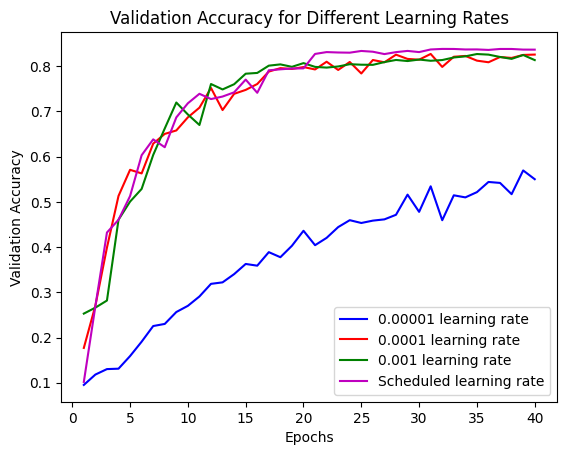

In [ ]:
import matplotlib.pyplot as plt

# Validation accuracy data
smallest_lr = [0.0952, 0.1181, 0.1302, 0.1311, 0.159,
            0.1908, 0.2254, 0.2301, 0.2564, 0.2701,
            0.2908, 0.3187, 0.322, 0.3402, 0.3627,
            0.3589, 0.3888, 0.3776, 0.4029, 0.4361,
            0.4042, 0.4204, 0.4442, 0.4595, 0.4533,
            0.4585, 0.4613, 0.4714, 0.516,  0.4779,
            0.5344, 0.4594, 0.5145, 0.5099, 0.5215,
            0.544,  0.5419, 0.517,  0.5695, 0.5501]


middle_lr = [0.177, 0.2705, 0.3988, 0.5131, 0.5709,
    0.5629, 0.6287, 0.6503, 0.6579, 0.6869,
    0.7083, 0.7518, 0.703,  0.7389, 0.7476,
    0.7606, 0.7881, 0.7957, 0.7939, 0.7981,
    0.7928, 0.8099, 0.7917, 0.8093, 0.7839,
    0.8137, 0.8086, 0.8255, 0.8161, 0.8144,
    0.8271, 0.7984, 0.8209, 0.8227, 0.8123,
    0.8087, 0.8203, 0.8183, 0.8249, 0.8257]



largest_lr = [0.2529, 0.2661, 0.2818, 0.4605, 0.5006,
    0.5286, 0.6037, 0.6623, 0.7197, 0.6932,
    0.6700, 0.7606, 0.7486, 0.7601, 0.7834,
    0.7851, 0.8012, 0.8040, 0.7986, 0.8068,
    0.7985, 0.7969, 0.7994, 0.8044, 0.8033,
    0.8030, 0.8091, 0.8138, 0.8114, 0.8147,
    0.8120, 0.8136, 0.8193, 0.8218, 0.8269,
    0.8256, 0.8204, 0.8162, 0.8248, 0.8135]

scheduled_lr = [0.1018, 0.2695, 0.4322, 0.4604, 0.5128,
    0.6031, 0.6382, 0.6208, 0.6868, 0.7180,
    0.7390, 0.7273, 0.7329, 0.7422, 0.7704,
    0.7412, 0.7909, 0.7931, 0.7949, 0.7952,
    0.8271, 0.8312, 0.8303, 0.8299, 0.8337,
    0.8320, 0.8268, 0.8311, 0.8338, 0.8312,
    0.8370, 0.8382, 0.8381, 0.8370, 0.8371,
    0.8360, 0.8381, 0.8381, 0.8367, 0.8366]


epochs = range(1, len(smallest_lr) + 1)

plt.plot(epochs, smallest_lr, 'b', label='0.00001 learning rate')
plt.plot(epochs, middle_lr, 'r', label='0.0001 learning rate')
plt.plot(epochs, largest_lr, 'g', label='0.001 learning rate')
plt.plot(epochs, scheduled_lr, 'm', label='Scheduled learning rate')
plt.title('Validation Accuracy for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

### Batch Size

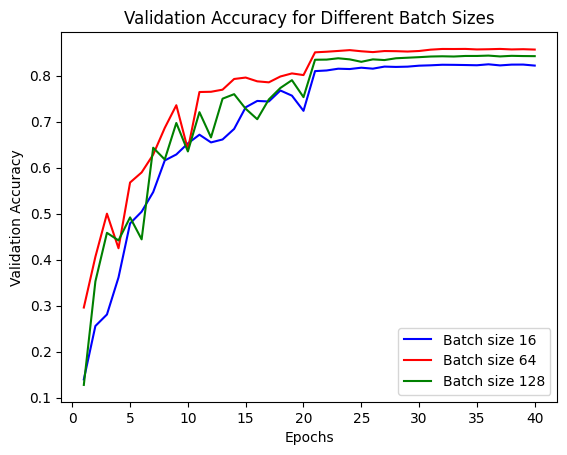

In [ ]:
import matplotlib.pyplot as plt

# Validation accuracy data
batch_size_16 = [0.1399, 0.2559, 0.2809, 0.3614, 0.4787, 0.5042, 0.5468, 0.6155, 0.6285, 0.6525,
                 0.6715, 0.6547, 0.6611, 0.6840, 0.7310, 0.7448, 0.7436, 0.7675, 0.7563, 0.7233,
                 0.8096, 0.8110, 0.8148, 0.8141, 0.8170, 0.8149, 0.8194, 0.8187, 0.8193, 0.8214,
                 0.8222, 0.8234, 0.8232, 0.8228, 0.8223, 0.8244, 0.8220, 0.8237, 0.8238, 0.8216]

batch_size_64  = [0.2960, 0.4062, 0.4999, 0.4248, 0.5676, 0.5895, 0.6283, 0.6862, 0.7355, 0.6394,
                  0.7642, 0.7647, 0.7693, 0.7925, 0.7956, 0.7874, 0.7852, 0.7979, 0.8046, 0.8010,
                  0.8504, 0.8517, 0.8534, 0.8552, 0.8527, 0.8509, 0.8532, 0.8529, 0.8521, 0.8533,
                  0.8562, 0.8577, 0.8576, 0.8578, 0.8567, 0.8571, 0.8578, 0.8567, 0.8572, 0.8564]

batch_size_128 = [0.1279, 0.3527, 0.4583, 0.4418, 0.4919, 0.4441, 0.6432, 0.6176, 0.6969, 0.6351,
                  0.7204, 0.6656, 0.7497, 0.7595, 0.7278, 0.7051, 0.7480, 0.7730, 0.7899, 0.7530,
                  0.8343, 0.8346, 0.8375, 0.8351, 0.8298, 0.8351, 0.8336, 0.8375, 0.8387, 0.8399,
                  0.8413, 0.8418, 0.8413, 0.8425, 0.8425, 0.8433, 0.8415, 0.8428, 0.8423, 0.8421]

epochs = range(1, len(batch_size_16) + 1)

plt.plot(epochs, batch_size_16, 'b', label='Batch size 16')
plt.plot(epochs, batch_size_64, 'r', label='Batch size 64')
plt.plot(epochs, batch_size_128, 'g', label='Batch size 128')
plt.title('Validation Accuracy for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

### Optimisers

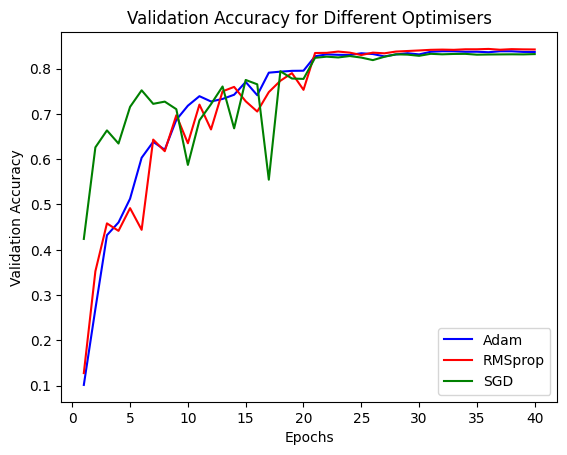

In [ ]:
import matplotlib.pyplot as plt

# Validation accuracy data
optimiser_Adam = [0.1018, 0.2695, 0.4322, 0.4604, 0.5128, 0.6031, 0.6382, 0.6208, 0.6868, 0.7180,
                         0.7390, 0.7273, 0.7329, 0.7422, 0.7704, 0.7412, 0.7909, 0.7931, 0.7949, 0.7952,
                         0.8271, 0.8312, 0.8303, 0.8299, 0.8337, 0.8320, 0.8268, 0.8311, 0.8338, 0.8312,
                         0.8370, 0.8382, 0.8381, 0.8370, 0.8371, 0.8360, 0.8381, 0.8381, 0.8367, 0.8366]


optimiser_RMSprop = [0.1279, 0.3527, 0.4583, 0.4418, 0.4919, 0.4441, 0.6432, 0.6176, 0.6969, 0.6351,
                  0.7204, 0.6656, 0.7497, 0.7595, 0.7278, 0.7051, 0.7480, 0.7730, 0.7899, 0.7530,
                  0.8343, 0.8346, 0.8375, 0.8351, 0.8298, 0.8351, 0.8336, 0.8375, 0.8387, 0.8399,
                  0.8413, 0.8418, 0.8413, 0.8425, 0.8425, 0.8433, 0.8415, 0.8428, 0.8423, 0.8421]


optimiser_SGD = [0.4240, 0.6261, 0.6635, 0.6345, 0.7154, 0.7520, 0.7221, 0.7270, 0.7103, 0.5873,
                  0.6857, 0.7214, 0.7604, 0.6680, 0.7748, 0.7652, 0.5547, 0.7940, 0.7780, 0.7771,
                  0.8237, 0.8262, 0.8245, 0.8276, 0.8242, 0.8186, 0.8260, 0.8314, 0.8307, 0.8281,
                  0.8325, 0.8314, 0.8322, 0.8324, 0.8306, 0.8310, 0.8312, 0.8314, 0.8312, 0.8319]


epochs = range(1, len(batch_size_16) + 1)

plt.plot(epochs, optimiser_Adam, 'b', label='Adam')
plt.plot(epochs, optimiser_RMSprop, 'r', label='RMSprop')
plt.plot(epochs, optimiser_SGD, 'g', label='SGD')
plt.title('Validation Accuracy for Different Optimisers')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

### Dropout

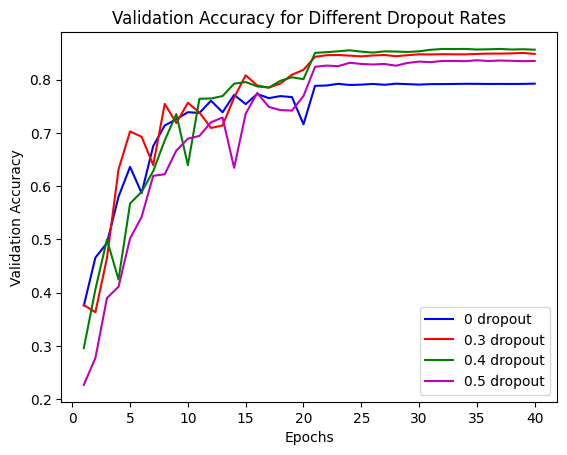

In [ ]:
import matplotlib.pyplot as plt

# Validation accuracy data
no_dropout = [0.3759, 0.4659, 0.4934, 0.5802, 0.6364, 0.5872, 0.6754, 0.7141, 0.7258, 0.7390,
             0.7376, 0.7606, 0.7389, 0.7716, 0.7542, 0.7732, 0.7654, 0.7692, 0.7674, 0.7163,
             0.7885, 0.7891, 0.7923, 0.7901, 0.7907, 0.7921, 0.7905, 0.7925, 0.7917, 0.7908,
             0.7917, 0.7918, 0.7920, 0.7923, 0.7922, 0.7920, 0.7921, 0.7920, 0.7921, 0.7926]


three_dropout = [0.3770, 0.3634, 0.4649, 0.6313, 0.7029, 0.6929, 0.6397, 0.7546, 0.7187, 0.7566,
               0.7385, 0.7094, 0.7140, 0.7664, 0.8082, 0.7892, 0.7851, 0.7927, 0.8093, 0.8186,
               0.8430, 0.8460, 0.8464, 0.8452, 0.8438, 0.8455, 0.8464, 0.8441, 0.8460, 0.8477,
               0.8474, 0.8479, 0.8477, 0.8476, 0.8484, 0.8490, 0.8490, 0.8494, 0.8503, 0.8484]



four_dropout = [0.2960, 0.4062, 0.4999, 0.4248, 0.5676, 0.5895, 0.6283, 0.6862, 0.7355, 0.6394,
               0.7642, 0.7647, 0.7693, 0.7925, 0.7956, 0.7874, 0.7852, 0.7979, 0.8046, 0.8010,
               0.8504, 0.8517, 0.8534, 0.8552, 0.8527, 0.8509, 0.8532, 0.8529, 0.8521, 0.8533,
               0.8562, 0.8577, 0.8576, 0.8578, 0.8567, 0.8571, 0.8578, 0.8567, 0.8572, 0.8564]

five_dropout = [0.2269, 0.2774, 0.3900, 0.4112, 0.5019, 0.5424, 0.6195, 0.6225, 0.6668, 0.6893,
                         0.6945, 0.7201, 0.7290, 0.6345, 0.7362, 0.7751, 0.7490, 0.7429, 0.7420, 0.7693,
                         0.8243, 0.8265, 0.8254, 0.8318, 0.8296, 0.8286, 0.8296, 0.8263, 0.8315, 0.8340,
                         0.8330, 0.8352, 0.8351, 0.8348, 0.8365, 0.8351, 0.8360, 0.8355, 0.8348, 0.8353]


epochs = range(1, len(no_dropout) + 1)

plt.plot(epochs, no_dropout, 'b', label='0 dropout')
plt.plot(epochs, three_dropout, 'r', label='0.3 dropout')
plt.plot(epochs, four_dropout, 'g', label='0.4 dropout')
plt.plot(epochs, five_dropout, 'm', label='0.5 dropout')
plt.title('Validation Accuracy for Different Dropout Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

### Pre-trained CNN

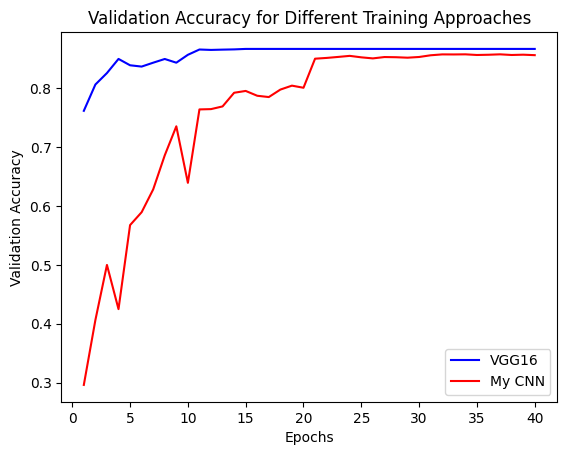

In [ ]:
import matplotlib.pyplot as plt

# Validation accuracy data
vgg16 = [
    0.7618, 0.8065, 0.8260, 0.8500, 0.8392, 0.8370, 0.8436, 0.8499, 0.8436, 0.8570,
    0.8660, 0.8653, 0.8658, 0.8662, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670,
    0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670,
    0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670
]


hyper_tuned_CNN = [0.2960, 0.4062, 0.4999, 0.4248, 0.5676, 0.5895, 0.6283, 0.6862, 0.7355, 0.6394,
               0.7642, 0.7647, 0.7693, 0.7925, 0.7956, 0.7874, 0.7852, 0.7979, 0.8046, 0.8010,
               0.8504, 0.8517, 0.8534, 0.8552, 0.8527, 0.8509, 0.8532, 0.8529, 0.8521, 0.8533,
               0.8562, 0.8577, 0.8576, 0.8578, 0.8567, 0.8571, 0.8578, 0.8567, 0.8572, 0.8564]


epochs = range(1, len(hyper_tuned_CNN) + 1)

plt.plot(epochs, vgg16, 'b', label='VGG16')
plt.plot(epochs, hyper_tuned_CNN, 'r', label='My CNN')

plt.title('Validation Accuracy for Different Training Approaches')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

### Pre-processing

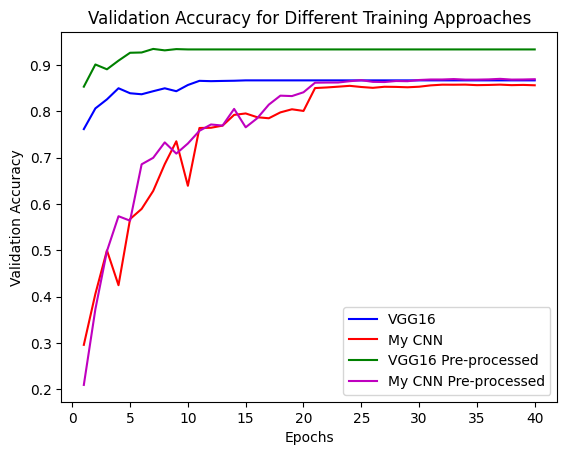

In [ ]:
import matplotlib.pyplot as plt

# Validation accuracy data
vgg16 = [
    0.7618, 0.8065, 0.8260, 0.8500, 0.8392, 0.8370, 0.8436, 0.8499, 0.8436, 0.8570,
    0.8660, 0.8653, 0.8658, 0.8662, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670,
    0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670,
    0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670, 0.8670
]


hyper_tuned_CNN = [0.2960, 0.4062, 0.4999, 0.4248, 0.5676, 0.5895, 0.6283, 0.6862, 0.7355, 0.6394,
               0.7642, 0.7647, 0.7693, 0.7925, 0.7956, 0.7874, 0.7852, 0.7979, 0.8046, 0.8010,
               0.8504, 0.8517, 0.8534, 0.8552, 0.8527, 0.8509, 0.8532, 0.8529, 0.8521, 0.8533,
               0.8562, 0.8577, 0.8576, 0.8578, 0.8567, 0.8571, 0.8578, 0.8567, 0.8572, 0.8564]

vgg16_pp = [
    0.8534, 0.9013, 0.8909, 0.9096, 0.9266, 0.9272, 0.9349, 0.9318, 0.9345, 0.9338,
    0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338,
    0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338,
    0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338, 0.9338
]


hyper_tuned_CNN_pp = [
    0.2095, 0.3731, 0.4985, 0.5737, 0.5641, 0.6858, 0.6998, 0.7331, 0.7089, 0.7307,
    0.7581, 0.7718, 0.7694, 0.8054, 0.7657, 0.7853, 0.8146, 0.8340, 0.8331, 0.8413,
    0.8620, 0.8623, 0.8624, 0.8652, 0.8674, 0.8638, 0.8634, 0.8656, 0.8652, 0.8678,
    0.8689, 0.8689, 0.8698, 0.8686, 0.8686, 0.8691, 0.8703, 0.8687, 0.8689, 0.8695
]

epochs = range(1, len(hyper_tuned_CNN) + 1)

plt.plot(epochs, vgg16, 'b', label='VGG16')
plt.plot(epochs, hyper_tuned_CNN, 'r', label='My CNN')
plt.plot(epochs, vgg16_pp, 'g', label='VGG16 Pre-processed')
plt.plot(epochs, hyper_tuned_CNN_pp, 'm', label='My CNN Pre-processed')

plt.title('Validation Accuracy for Different Training Approaches')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()